# About this notebook
Based on Tensorflow's tutorial 
( https://www.tensorflow.org/tutorials/keras/classification ), I've created a model that identifies the difference between my face and onion images. Keras sequential API is so easy to use: What I've done is basically just prepared and converted images to 28x28 grayscale NumPy arrays. I could learn the basics of Python using the tutorials. Still, there are many things to be desired, but making programs on my own helps me a lot to understand new concepts. I will keep on making models while reading tutorials!

**I am going to add comments about what I learned from the making the models. I try not to make just a similar copy of the original tutorials.**

**Correct if I'm wrong!**


Kanta Yamaoka







# Importing modules

In [44]:
import os
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# Creating folders and uploading datasets

First, make sure to create the required directories below:

In [45]:
dirNames=['./raw_train_images','./train_images','./test_images']
for dirName in dirNames:
  if not os.path.exists(dirName):
    os.mkdir(dirName)

After making sure they exist, please upload Kanta's face images and Onion images to ./train_images

# Preparing training datasets


In [46]:
# Converts 28x28 jpegs to grayscale 28x28 png
# This is because most of the DL tutorials with TF uses this format.
# Probably because of the computational costs? 
for i in range(8):
  im = np.array(Image.open('./raw_train_images/{}.jpg'.format(i)).convert('L'))
  gr_im= Image.fromarray(im).save('./train_images/{}.png'.format(i))

(8, 28, 28)
training datasets:


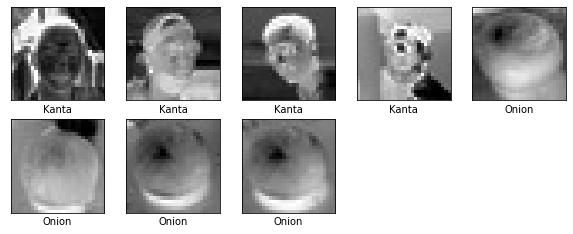

In [47]:
# This cell prepares training datasets
train_images=[]
class_names=['Kanta','Onion']
train_labels=np.array([0,0,0,0,1,1,1,1])


for i in range(8):
  # Normalizes each image's pixel values
  im = np.asarray(Image.open('./train_images/{}.png'.format(i))) /255.0
  # Adds each image to a list
  train_images.append(im)

# Converts the list of images into an np array
train_images=np.array(train_images)
print(train_images.shape)


# Displays all the training datasets
print('training datasets:')
plt.figure(figsize=(10,10))
for i in range(8):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(class_names[train_labels[i]])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)

plt.show()

## Oh, BTW, how to deal with images in Python?


There are multiple ways to deal with images in Python.

For example, the lines below opens converted images using Tensorflow, not PIL:

```
for i in range(8):
  image=tf.io.read_file(filename='./{}.png'.format(i))
  image=tf.io.decode_jpeg(image, channels=3)
  print(image.shape)
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])

  plt.show()
```

Note that the line

```
tf.io.decode_jpeg(image, channels=3)
```
returns Tensor, not NumPy array.
In this notebook, I used NumPy array for images, but you can also use Tensor as image file expression.
Please let me know the pros and cons of both an NumPy arary and Tonsor to express images if you know well.


# Preparing test datasets
For simplicity, we're going to extract two images from training datasets as test datasets. **However, this is not appropriate for real situation.** 
**This notebook only aims to learn the basics of PIL, Keras, Tensorflow, and NumPy, not the best practices of dealing with data.**


(2, 28, 28)
test datasets:


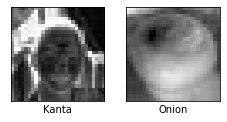

In [48]:
test_images=[]
test_labels=np.array([0,1])

# You can decide which to extract from the train datasets with the indecies below:
extractIndecies=[0,4]
for i in extractIndecies:
  # Normalizes each image's pixel values
  im = np.asarray(Image.open('./train_images/{}.png'.format(i))) /255.0
  # Adds each image to a list
  test_images.append(im)

# Converts the list of images into an np array
test_images=np.array(test_images)
print(test_images.shape)


# Displays all the test datasets
print('test datasets:')
plt.figure(figsize=(10,10))
for i in range(2):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(class_names[test_labels[i]])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)

plt.show()


 ## What is cmap?
You see the argument cmap in the plt.imshow() method:
 ```
 cmap=plt.cm.binary
 ```

 According to official document, it goes like:
 ```
 cmap : str or ~matplotlib.colors.Colormap, optional

    The Colormap instance or registered colormap name used to map  
    scalar data to colors. This parameter is ignored for RGB(A) data.  
    Defaults to :rc:`image.cmap`
 ```

If you delete the arugment, you will see that the overall color of the displayed image will change. This is because different colormap maps pixel values to different colors.

# Build the model
For more details, read the section *Build the model* on: https://www.tensorflow.org/tutorials/keras/classification

In [60]:
model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28,28)),
                          keras.layers.Dense(128, activation="relu"),
                          keras.layers.Dense(10)
])

## What is Flatten?
The flatten method transforms two-dimensional vectors into one-dimensional vectors.

## What does the first arugment ***units*** mean?

According to the official domunent:
```
 units: Positive integer, dimensionality of the output space. 
```
Sorry, under construction


## What is "relu" and why we use it?
ReLU stands for Recutified Linear Unit.
Let f(x) is ReLU.

>When x is positive, f(x)=x

>Otherwise, f(x)=0

* Lower computational costs compared to Sigmoid, for example.
* Can solve the ***vanishing gradient problem***
https://en.wikipedia.org/wiki/Vanishing_gradient_problem

In this case, if we use sigmoid function by
```
keras.layers.Dense(128,activation="sigmoid")
```
You will see poorer recognition performance later though the model identefies the difference to some extent.

## What is Dense?
```
keras.layers.Dense()
```
offers densely connected, or fully connected, neural layers.
Unlike the original convolutional neural networks, each layer is connected to many other layers.

This article will help you get the concept:
https://medium.com/@anilmatcha/summary-for-densely-connected-convolutional-networks-7996dca315ce


# Compile the model

In [50]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model

In [51]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1/1 [==============================] - 0s 1ms/step - loss: 0.8551 - accuracy: 0.5000
Epoch 2/10
1/1 [==============================] - 0s 2ms/step - loss: 1.2501 - accuracy: 0.5000
Epoch 3/10
1/1 [==============================] - 0s 2ms/step - loss: 0.7838 - accuracy: 0.5000
Epoch 4/10
1/1 [==============================] - 0s 2ms/step - loss: 0.5981 - accuracy: 0.5000
Epoch 5/10
1/1 [==============================] - 0s 2ms/step - loss: 0.7183 - accuracy: 0.5000
Epoch 6/10
1/1 [==============================] - 0s 901us/step - loss: 0.6095 - accuracy: 0.5000
Epoch 7/10
1/1 [==============================] - 0s 1ms/step - loss: 0.4425 - accuracy: 1.0000
Epoch 8/10
1/1 [==============================] - 0s 2ms/step - loss: 0.4180 - accuracy: 0.8750
Epoch 9/10
1/1 [==============================] - 0s 1ms/step - loss: 0.4543 - accuracy: 0.7500
Epoch 10/10
1/1 [==============================] - 0s 1ms/step - loss: 0.4364 - accuracy: 0.7500


# Evaluate accuraccy

In [52]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\n Test accuraccy:', test_acc)

1/1 - 0s - loss: 0.3441 - accuracy: 1.0000

 Test accuraccy: 1.0


# Make predictions

In [53]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [54]:
predictions = probability_model.predict(test_images)

In [55]:
predictions[0]

array([0.59228504, 0.4077149 ], dtype=float32)

In [56]:
np.argmax(predictions[0])

0

In [57]:
test_labels[0]

0

Graph this to look at the full set of 2 class predictions.

In [58]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(img, cmap=plt.cm.binary)
  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel('{} {:2.0f}%({})'.format(class_names[predicted_label],
                                      100*np.max(predictions_array),
                                      class_names[true_label]),
                                       color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(2))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color='#777777')
  plt.ylim([0,1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')
  

# Verify predictions

ValueError: ignored

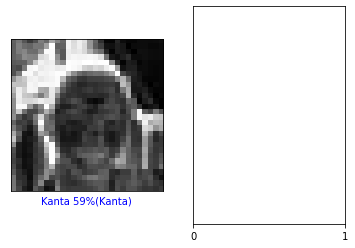

In [59]:
for i in range(2):
  plt.figure()
  plt.subplot(1,2,1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(1,2,2)
  plot_value_array(i, predictions[i], test_labels)
  plt.show()